In [2]:
import pandas as pd

In [106]:
import matplotlib.pyplot as plt

In [107]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [108]:
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

# train 파일 확인

In [3]:
# d_l_match_yn :  속성 D 대분류 매칭 여부
# d_m_match_yn :  속성 D 중분류 매칭 여부
# d_s_match_yn :  속성 D 소분류 매칭 여부
# h_l_match_yn :  속성 H 대분류 매칭 여부
# h_m_match_yn :  속성 H 중분류 매칭 여부
# h_s_match_yn :  속성 H 소분류 매칭 여부

# person_attribute_a :  회원 속성 A
# person_attribute_a_1 :  회원 속성 A 하위 속성 1
# person_attribute_b :  회원 속성 B

# person_prefer_c :  회원 선호 속성 C
# person_prefer_d_1 :  회원 선호 속성 D 1번
# person_prefer_d_2 :  회원 선호 속성 D 2번
# person_prefer_d_3 :  회원 선호 속성 D 3번
# person_prefer_e :  회원 선호 속성 E
# person_prefer_f :  회원 선호 속성 F
# person_prefer_g :  회원 선호 속성 G
# person_prefer_h_1 :  회원 선호 속성 H 1번
# person_prefer_h_2 :  회원 선호 속성 H 2번
# person_prefer_h_3 :  회원 선호 속성 H 3번

# contents_attribute_i :  컨텐츠 속성 I
# contents_attribute_a :  컨텐츠 속성 A
# contents_attribute_j_1 :  컨텐츠 속성 J 하위 속성 1
# contents_attribute_j :  컨텐츠 속성 J
# contents_attribute_c :  컨텐츠 속성 C
# contents_attribute_k :  컨텐츠 속성 K
# contents_attribute_l :  컨텐츠 속성 L
# contents_attribute_d :  컨텐츠 속성 D
# contents_attribute_m :  컨텐츠 속성 M
# contents_attribute_e :  컨텐츠 속성 E
# contents_attribute_h :  컨텐츠 속성 H

# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시
# target :  컨텐츠 사용 여부 (라벨)

In [4]:
train = pd.read_csv('../data/train.csv')
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [6]:
train.shape

(501951, 35)

In [7]:
len(train.columns), train.columns

(35,
 Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
        'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
        'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
        'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
        'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
        'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
        'contents_attribute_i', 'contents_attribute_a',
        'contents_attribute_j_1', 'contents_attribute_j',
        'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
        'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
        'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
        'target'],
       dtype='object'))

# train 타겟 

In [ ]:
train['target'].value_counts()

0    251106
1    250845
Name: target, dtype: int64

# test 파일 확인

In [8]:
test = pd.read_csv('../data/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [9]:
# d_l_match_yn :  속성 D 대분류 매칭 여부
# d_m_match_yn :  속성 D 중분류 매칭 여부
# d_s_match_yn :  속성 D 소분류 매칭 여부
# h_l_match_yn :  속성 H 대분류 매칭 여부
# h_m_match_yn :  속성 H 중분류 매칭 여부
# h_s_match_yn :  속성 H 소분류 매칭 여부
# person_attribute_a :  회원 속성 A
# person_attribute_a_1 :  회원 속성 A 하위 속성 1
# person_attribute_b :  회원 속성 B
# person_prefer_c :  회원 선호 속성 C
# person_prefer_d_1 :  회원 선호 속성 D 1번
# person_prefer_d_2 :  회원 선호 속성 D 2번
# person_prefer_d_3 :  회원 선호 속성 D 3번
# person_prefer_e :  회원 선호 속성 E
# person_prefer_f :  회원 선호 속성 F
# person_prefer_g :  회원 선호 속성 G
# person_prefer_h_1 :  회원 선호 속성 H 1번
# person_prefer_h_2 :  회원 선호 속성 H 2번
# person_prefer_h_3 :  회원 선호 속성 H 3번
# contents_attribute_i :  컨텐츠 속성 I
# contents_attribute_a :  컨텐츠 속성 A
# contents_attribute_j_1 :  컨텐츠 속성 J 하위 속성 1
# contents_attribute_j :  컨텐츠 속성 J
# contents_attribute_c :  컨텐츠 속성 C
# contents_attribute_k :  컨텐츠 속성 K
# contents_attribute_l :  컨텐츠 속성 L
# contents_attribute_d :  컨텐츠 속성 D
# contents_attribute_m :  컨텐츠 속성 M
# contents_attribute_e :  컨텐츠 속성 E
# contents_attribute_h :  컨텐츠 속성 H
# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시

In [10]:
test.shape

(46404, 34)

In [11]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,...,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,...,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,...,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,...,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,...,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


In [12]:
train.d_l_match_yn.unique()

array([ True, False])

In [13]:
train.d_m_match_yn.unique()

array([ True, False])

In [14]:
train.d_s_match_yn.unique()

array([ True, False])

In [15]:
train.h_l_match_yn.unique()

array([False,  True])

In [16]:
train.columns[0]

'id'

In [17]:
len(train.columns)

35

In [18]:
for col in train.columns[:11]:
    print(col)
    print(train[col].unique())

id
[     0      1      2 ... 501948 501949 501950]
d_l_match_yn
[ True False]
d_m_match_yn
[ True False]
d_s_match_yn
[ True False]
h_l_match_yn
[False  True]
h_m_match_yn
[False  True]
h_s_match_yn
[False  True]
person_attribute_a
[1 2]
person_attribute_a_1
[4 3 0 1 2 5 6 7]
person_attribute_b
[3 4 2 5 1 0]
person_prefer_c
[5 1 3 2 4]


In [19]:
for col in train.columns[11:17]:
    print(col)
    print(train[col].unique())

person_prefer_d_1
[275 114 464 ... 890 801 633]
person_prefer_d_2
[370 181 175 ... 193   4 548]
person_prefer_d_3
[369 175 452 ... 828 914 306]
person_prefer_e
[ 8  4  3  5  6  0  7 11  9  2  1 10]
person_prefer_f
[1]
person_prefer_g
[1]


In [20]:
len(train.person_prefer_d_1.unique())

1093

In [21]:
len(train.person_prefer_d_2.unique())

1081

In [22]:
len(train.person_prefer_d_3.unique())

1043

In [23]:
len(train.person_prefer_e.unique())

12

In [24]:
# unique()
# person_prefer_d_1 : 1093
# person_prefer_d_2 : 1081
# person_prefer_d_3 : 1043

In [25]:
for col in train.columns[17:18]:
    print(col)
    print(train[col].unique())

person_prefer_h_1
[  4 131  54  72 214  49 126 138 116 285   2  56 119 139  96  20 107  59
  22  25  75  76  53  77  27  31 109   9 260 121  64 133  61  68  66 255
 114 132  95 258 251 104 288 113 135  74  28 127 120  67  38 170   7   6
 254 252 279 282 256  55 174 105  51  63 171  29 156 262 278  82  19  65
 210  36  46 189 287 215 209 193  21 192  79 118 281  39 273 186 272 284
 190 213 202 137 291 232 158  44  60  34  41  18 263 134 178  24 125 195
  10 101  40 124  13 217 290 313  43  86 261  73 128 100 106  52 309 233
 152  37  89 280  15  23  97 123 228  91 238 230  42  88 177 227  26 141
 122 286  98  35 130 103  99 142  17  33 140  45  69  32 240 148 153 199
 259 191  57 295  47 298 253 283 294   8 229 293 246 129 150  16 212 184
 301  11 224  90 297  87 311 265 115  93 173 243 194 162  50   5 117 231
 163  14 102 264  83 200 175 108 310 183 296 196 206 160  12 211  81 182
 270 216 292 257 289 136 299 248 300 154 223 197 234 242 172 143 241 155
 151  84 147 203 218 271 225 239 

In [26]:
len(train.person_prefer_h_1.unique())

279

In [27]:
for col in train.columns[18:19]:
    print(col)
    print(train[col].unique())

person_prefer_h_2
[ 95 101 263 227 210 251 139  68 127 287   4  49  96 135  19 278  27 313
  21 130  25  24 238  54  77  52  72 241 119  59 138  79 121  28  18  76
  20 122  65 131 109  60  69  67 291 128 114 133   7 230  63 116 288 100
 102 279  61  29 231  64  40  44 137  17 253 254 283  50 258 281 150  66
 190 126 272   2  22 106  31  34  51  53 189 285 212  73  74  56 113 280
  46 293 262 265 177 218 217 194 246 186 252  57 298 309 118  23 134  86
  45  36 104 152  43 195  38  12 140 125 260 117 255 256 211 171  33  42
 286   6   5 172 213  15 123 295 132 107 282 233 202  99  32 120 284  37
 243  88 232 249 228  91 170 141 209 105  98 290 153  41 124  39  75  93
  90 196 199 192 191  55 214   8 103  87  16 156 261  35 108 294 184 136
  47 159 151 129  97 142 301 292 223  89  26 242 174 115 229 161   9  10
 205 273 164  13 234  11  14 187 198  84  80 146 183 289 175 271 245 206
 178 185  82 181 163 259 257 300 311 215 299 168 200 173 201 193 270 143
 147 240 216  83 310 236 167 203 

In [28]:
len(train.person_prefer_h_2.unique())

279

In [29]:
for col in train.columns[19:20]:
    print(col)
    print(train[col].unique())

person_prefer_h_3
[ 59  96  56   2 209 258 109 139 279  95 251 131   4 116 128  24 129 106
 124  22  23 231 263  74  50 227 238  86  29  17  72  57  67  20  66  68
 101  63 133 100 113  49 138 137 103  27 278  15  21 122  77  10  18  65
  45  36  79  16 252 293 281 280  55  60 127 114   9 151 257 298 126  26
  31  93 189  38  52 130 286 210 213 104 191 288  37 274 184 214 244 190
 170 253 132 270  54 229 152 301  75 271 291 309  32 260 177  25  14  44
  40 272  51 141 218  41 142  46  43 295  69   5 121 254  39 225 246  98
 256 118  53 285 290 117 228 192  76  91 282  33 107 233 242 171 135  61
 120  28  99 150 195  73 119 140 186  64   7  42 196  35 247 134 283  19
 125  89 310 115  97  34 217 284 313  11 292 287 102 148   6  88 153  80
 294 143 255 289 105  47 194  90 273 230 108 243 180  12 205 136 168 215
 187 261 202  13  87 182  81 174 232 183 199 185  82 220 146 296 241 212
 216  83 235 175 201 264 160 159 172 167 123 181 161 173 193 259 237 236
   8 211 262 266 297 269 178 157 

In [30]:
len(train.person_prefer_h_3.unique())

279

In [31]:
# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
# 모두 279개의 유니크 값 갖는다.

In [32]:
for col in train.columns[20:26]:
    print(col)
    print(train[col].unique())

contents_attribute_i
[3 1 2]
contents_attribute_a
[3 1 2]
contents_attribute_j_1
[10  5  3  6  4  9  2  8  1]
contents_attribute_j
[2 1]
contents_attribute_c
[1 3 4 2]
contents_attribute_k
[2 1]


In [33]:
len(train.contents_attribute_j_1.unique())

9

In [34]:
for col in train.columns[26:27]:
    print(col)
    print(train[col].unique())

contents_attribute_l
[1608 1600 1817 ... 1246  751 1905]


In [35]:
len(train.contents_attribute_l.unique())

1752

In [36]:
for col in train.columns[27:30]:
    print(col)
    print(train[col].unique())

contents_attribute_d
[ 275   94  492 ...  631 1116  829]
contents_attribute_m
[1 5 2 4 3]
contents_attribute_e
[ 4  3  5  6  1 11  8  7  2  0 10  9]


In [37]:
len(train.contents_attribute_d.unique())

1065

In [38]:
for col in train.columns[30:31]:
    print(col)
    print(train[col].unique())

contents_attribute_h
[139 133  53  74 285  54 233  21  66 120  68 260  76  32 109 138 134  45
  61 262  36  44 187  16 254  41 282  98 256 261  51  19  26  50 156  67
 283 123 273 295 130 140 293 280 237  99 215 272 160 213 186 244 105  43
 104 258 195  38 287 125   9 298 217 202  75  97 240   7 121 284  42 288
  73 228  91 102  14 162  46 127 148 248 291  55 182 173 289  29  22  65
 157 142 199 259   8 181 126  10 224 274   5  20 286 108 246 206 178  83
 152 192 137 113 129 184  87 297  37 122 117  39 311 230  88 114 174  15
 107  63  28 243  13   6 118  80  47 194 163  89  82 124  64 132  25 310
 175 103 172 185 219 265 270  34 249 301  35 211 214  52 143  24 136 161
 216 229  77 200 255  27 153 290 193 158  57  81 191 197 300 205 180 159
 146  12 241 168 196 238 271  93 263 155  18 141 151  23  90  84  17 235
 128 135  56 253 236  33 281  69 257 100 269 177  11 231 115 292 242 264
 296  70 245 294 154 239 234 167 221 166 164 267 198 222  60  40 212 218
 275 203 266 223 225 232 201 2

In [39]:
len(train.contents_attribute_h.unique())

250

In [40]:
# unique()
# contents_attribute_l : 1752
# contents_attribute_d : 1065
# contents_attribute_h : 250

In [41]:
for col in train.columns[31:33]:
    print(col)
    print(train[col].unique())

person_rn
[618822 571659 399816 ... 648140 470285 484528]
contents_rn
[354805 346213 206408 ... 627471 293258 273797]


In [42]:
len(train.person_rn.unique())

300177

In [43]:
len(train.contents_rn.unique())

283359

In [44]:
for col in train.columns[33:]:
    print(col)
    print(train[col].unique())

contents_open_dt
['2020-01-17 12:09:36' '2020-06-18 17:48:52' '2020-07-08 20:00:10' ...
 '2020-08-05 17:27:24' '2020-06-15 09:23:21' '2020-05-25 14:34:48']
target
[1 0]


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

# train unique값 개수
* 총 501951개 샘플
* unique()
    * d_l_match_yn : True, False
    * d_m_match_yn : True, False
    * d_s_match_yn : True, False
    * h_l_match_yn : True, False
    * h_m_match_yn : True, False
    * h_s_match_yn : True, False
    ---
    * person_attribute_a : 2(1~2)
    * person_attribute_a_1 : 8(0~7)
    * person_attribute_b : 6(0~5)
    * person_prefer_c : 5(1~5)
    * person_prefer_d_1 : 1093
    * person_prefer_d_2 : 1081
    * person_prefer_d_3 : 1043
    * person_prefer_e : 12(0~11)
    * person_prefer_f : 1(1)
    * person_prefer_g : 1(1)
    * person_prefer_h_1 : 279
    * person_prefer_h_2 : 279
    * person_prefer_h_3 : 279
    ---
    * contents_attribute_i : 3(1~3)
    * contents_attribute_a : 3(1~3)
    * contents_attribute_j_1 : 9(1~10, 7제외)
    * contents_attribute_j : 2(1~2)
    * contents_attribute_c : 4(1~4)
    * contents_attribute_k : 2(1~2)
    * contents_attribute_l : 1752
    * contents_attribute_d : 1065
    * contents_attribute_m : 5(1~5)
    * contents_attribute_e : 12(0~11)
    * contents_attribute_h : 250
    ---
    * person_rn : 300177
    * contents_rn : 283359

In [46]:
for col in test.columns[:11]:
    print(col)
    print(test[col].unique())

id
[    0     1     2 ... 46401 46402 46403]
d_l_match_yn
[ True False]
d_m_match_yn
[False  True]
d_s_match_yn
[False  True]
h_l_match_yn
[ True False]
h_m_match_yn
[ True False]
h_s_match_yn
[ True False]
person_attribute_a
[1 2]
person_attribute_a_1
[1 0 3 2 6 7 4 5]
person_attribute_b
[2 4 3 5 1 0]
person_prefer_c
[1 2 5 4 3]


In [47]:
for col in test.columns[11:14]:
    print(col)
    print(len(test[col].unique()))

person_prefer_d_1
955
person_prefer_d_2
863
person_prefer_d_3
775


In [48]:
for col in test.columns[14:17]:
    print(col)
    print(test[col].unique())

person_prefer_e
[ 4  2  0  5  3  6  7  8 11 10  9  1]
person_prefer_f
[1]
person_prefer_g
[1]


In [49]:
for col in test.columns[17:20]:
    print(col)
    print(len(test[col].unique()))

person_prefer_h_1
271
person_prefer_h_2
274
person_prefer_h_3
270


In [50]:
for col in test.columns[20:26]:
    print(col)
    print(test[col].unique())

contents_attribute_i
[1 3 2]
contents_attribute_a
[3 1 2]
contents_attribute_j_1
[10  5  3  9  4  6  2  8  1]
contents_attribute_j
[2 1]
contents_attribute_c
[1 3 4 2]
contents_attribute_k
[2 1]


In [51]:
for col in test.columns[26:28]:
    print(col)
    print(len(test[col].unique()))

contents_attribute_l
1422
contents_attribute_d
919


In [52]:
for col in test.columns[28:30]:
    print(col)
    print(test[col].unique())

contents_attribute_m
[1 3 5 4 2]
contents_attribute_e
[ 5  4  3  2  6  7  0  1  8  9 10 11]


In [53]:
for col in test.columns[30:]:
    print(col)
    print(len(test[col].unique()))

contents_attribute_h
247
person_rn
34534
contents_rn
31489
contents_open_dt
45813


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

# test unique값 개수
* 총 46404개 샘플
* unique()
    * d_l_match_yn : True, False
    * d_m_match_yn : True, False
    * d_s_match_yn : True, False
    * h_l_match_yn : True, False
    * h_m_match_yn : True, False
    * h_s_match_yn : True, False
    ---
    * person_attribute_a : 2(1~2)
    * person_attribute_a_1 : 8(0~7)
    * person_attribute_b : 6(0~5)
    * person_prefer_c : 5(1~5)
    * person_prefer_d_1 : 955
    * person_prefer_d_2 : 863
    * person_prefer_d_3 : 775
    * person_prefer_e : 12(0~11)
    * person_prefer_f : 1(1)
    * person_prefer_g : 1(1)
    * person_prefer_h_1 : 271
    * person_prefer_h_2 : 274
    * person_prefer_h_3 : 270
    ---
    * contents_attribute_i : 3(1~3)
    * contents_attribute_a : 3(1~3)
    * contents_attribute_j_1 : 9(1~10, 7제외)
    * contents_attribute_j : 2(1~2)
    * contents_attribute_c : 4(1~4)
    * contents_attribute_k : 2(1~2)
    * contents_attribute_l : 1422
    * contents_attribute_d : 919
    * contents_attribute_m : 5(1~5)
    * contents_attribute_e : 12(0~11)
    * contents_attribute_h : 247
    ---
    * person_rn : 34534
    * contents_rn : 31489

# 데이터 결측치 확인(결측치 없음)

In [55]:
train.isnull().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
target                    0
dtype: int64

In [56]:
test.isnull().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
dtype: int64

# 속성 분류 매칭 여부 특성과 타겟
    * d_l_match_yn :  속성 D 대분류 매칭 여부
    * d_m_match_yn :  속성 D 중분류 매칭 여부
    * d_s_match_yn :  속성 D 소분류 매칭 여부
    * h_l_match_yn :  속성 H 대분류 매칭 여부
    * h_m_match_yn :  속성 H 중분류 매칭 여부
    * h_s_match_yn :  속성 H 소분류 매칭 여부

In [59]:
train['d_l_match_yn'].value_counts()

True     315268
False    186683
Name: d_l_match_yn, dtype: int64

<BarContainer object of 2 artists>

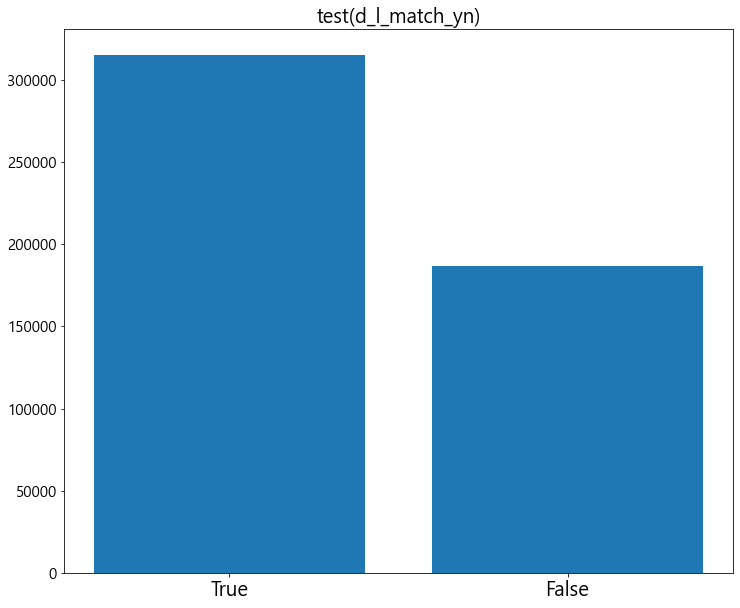

In [60]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.title('test(d_l_match_yn)', fontdict={'fontsize':20})
plt.bar(x=['True', 'False'], height=train['d_l_match_yn'].value_counts(), data=train)

In [61]:
test['d_l_match_yn'].value_counts()

True     28798
False    17606
Name: d_l_match_yn, dtype: int64

<BarContainer object of 2 artists>

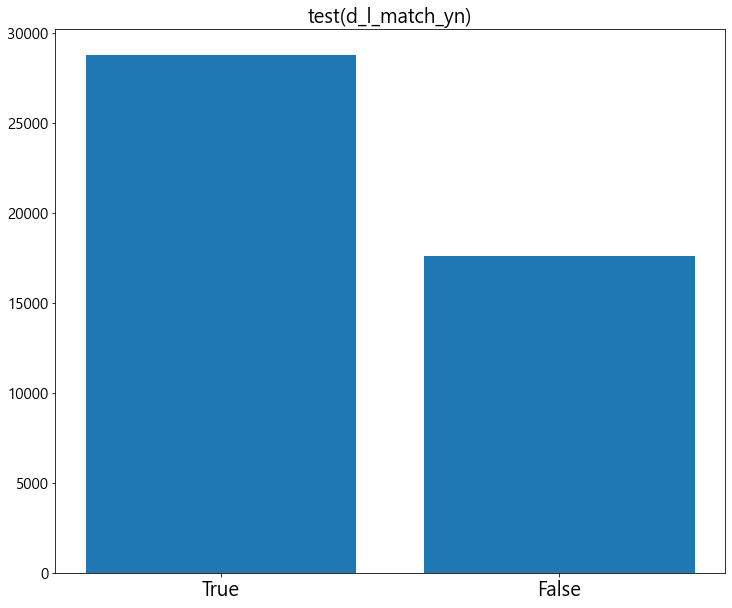

In [62]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.title('test(d_l_match_yn)', fontdict={'fontsize':20})
plt.bar(x=['True', 'False'], height=test['d_l_match_yn'].value_counts(), data=test)

In [63]:
train.d_m_match_yn.value_counts()

False    368324
True     133627
Name: d_m_match_yn, dtype: int64

In [64]:
train_person_rn = train.person_rn.value_counts()
train_person_rn

627445     20
1047079    19
241140     19
827703     19
1016996    18
           ..
798856      1
54141       1
467843      1
988037      1
907205      1
Name: person_rn, Length: 300177, dtype: int64

In [65]:
train_person_rn = train_person_rn[train_person_rn > 9]
train_person_rn

627445     20
1047079    19
241140     19
827703     19
1016996    18
           ..
217354     10
583392     10
649969     10
259645     10
761137     10
Name: person_rn, Length: 656, dtype: int64

In [66]:
train_person_rn = train_person_rn.reset_index(drop=True)
train_person_rn

0      20
1      19
2      19
3      19
4      18
       ..
651    10
652    10
653    10
654    10
655    10
Name: person_rn, Length: 656, dtype: int64

In [67]:
train_person_rn.index

RangeIndex(start=0, stop=656, step=1)

<BarContainer object of 656 artists>

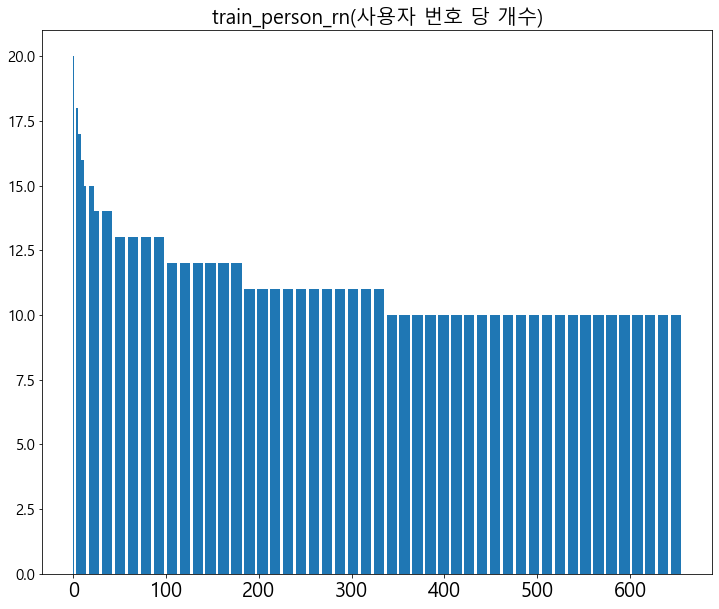

In [68]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.title('train_person_rn(사용자 번호 당 개수)', fontdict={'fontsize':20})
plt.bar(x=train_person_rn.index, height=train_person_rn)

In [69]:
train[train['person_rn']==627445]

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
3319,3319,False,False,False,True,False,False,1,6,2,...,2,1151,756,5,4,108,627445,414363,2020-02-13 02:03:32,1
4843,4843,False,False,False,True,False,False,1,6,2,...,2,361,978,2,5,139,627445,357354,2020-02-09 21:58:11,0
5752,5752,False,False,False,True,False,False,1,6,2,...,2,749,95,2,3,139,627445,358408,2020-02-19 12:47:33,1
16588,16588,False,False,False,False,False,False,1,6,2,...,2,702,750,5,4,22,627445,107394,2020-02-19 01:06:53,1
19979,19979,False,False,False,True,False,False,1,6,2,...,2,1805,38,1,4,127,627445,425267,2020-02-14 11:53:53,1
52916,52916,False,False,False,True,False,False,1,6,2,...,2,572,978,1,6,128,627445,415662,2020-02-26 21:54:32,1
94001,94001,False,False,False,True,False,False,1,6,2,...,2,975,768,1,4,107,627445,415479,2020-02-19 22:11:57,1
117891,117891,False,False,False,False,False,False,1,6,2,...,2,654,748,4,4,22,627445,64968,2020-02-14 18:50:17,1
124206,124206,False,False,False,True,False,False,1,6,2,...,2,757,978,1,4,109,627445,400244,2020-02-10 16:12:55,0
129379,129379,False,False,False,False,False,False,1,6,2,...,2,693,46,2,10,43,627445,107568,2020-02-20 22:14:48,0


In [70]:
train.person_rn.unique()

array([618822, 571659, 399816, ..., 648140, 470285, 484528], dtype=int64)

In [71]:
train.contents_rn.value_counts()

22078     39
76824     36
138209    32
72025     29
402922    28
          ..
581489     1
65397      1
59254      1
585591     1
571531     1
Name: contents_rn, Length: 283359, dtype: int64

In [72]:
train[train['contents_rn']==22078]

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
120004,120004,True,True,True,False,False,False,1,3,2,...,2,1681,703,3,4,26,619187,22078,2020-07-22 08:39:13,1
197073,197073,True,True,True,True,False,False,1,0,4,...,2,1681,703,3,4,26,63459,22078,2020-09-04 16:03:26,1
197074,197074,True,True,False,True,False,False,1,2,4,...,2,1681,703,3,4,26,43955,22078,2020-07-23 12:20:09,1
197075,197075,False,False,False,False,False,False,2,0,4,...,2,1681,703,3,4,26,636435,22078,2020-09-11 14:41:37,1
197076,197076,True,True,False,False,False,False,2,0,4,...,2,1681,703,3,4,26,699027,22078,2020-08-04 18:59:17,1
207726,207726,True,True,False,True,False,False,1,4,2,...,2,1681,703,3,4,26,5138,22078,2020-08-31 17:10:20,0
207728,207728,True,True,False,True,False,False,2,0,4,...,2,1681,703,3,4,26,89818,22078,2020-07-21 19:17:09,1
207729,207729,True,False,False,True,False,False,1,1,5,...,2,1681,703,3,4,26,108598,22078,2020-07-25 23:27:24,1
258230,258230,True,False,False,True,False,False,2,0,2,...,2,1681,703,3,4,26,94582,22078,2020-09-11 17:35:30,1
258231,258231,False,False,False,True,False,False,2,6,4,...,2,1681,703,3,4,26,113008,22078,2020-07-22 10:08:01,1


# 사용자별 컨텐츠 이용 수로 분석

In [74]:
train['person_rn'].value_counts()

627445     20
1047079    19
241140     19
827703     19
1016996    18
           ..
798856      1
54141       1
467843      1
988037      1
907205      1
Name: person_rn, Length: 300177, dtype: int64

In [75]:
person_rn_set = train['person_rn'].value_counts().reset_index()
person_rn_set

,index,person_rn
0,627445,20
1,1047079,19
2,241140,19
3,827703,19
4,1016996,18
...,...,...
300172,798856,1
300173,54141,1
300174,467843,1
300175,988037,1


In [82]:
person_rn_set['index'][:1]

0    627445
Name: index, dtype: int64

In [89]:
person_rn_set.loc[0, 'index']

627445

In [91]:
indx = person_rn_set.loc[0, 'index']
train[train['person_rn']==indx]['target']

3319      1
4843      0
5752      1
16588     1
19979     1
52916     1
94001     1
117891    1
124206    0
129379    0
145173    1
190904    0
194295    0
224728    1
317736    0
335861    1
374641    1
379382    1
391452    0
400004    0
Name: target, dtype: int64

In [103]:
indx = person_rn_set.loc[0, 'index']
tmp = train[train['person_rn']==indx]['target']
tmp.value_counts(normalize=True)

1    0.6
0    0.4
Name: target, dtype: float64

In [104]:
type(tmp.value_counts(normalize=True))

pandas.core.series.Series

<BarContainer object of 2 artists>

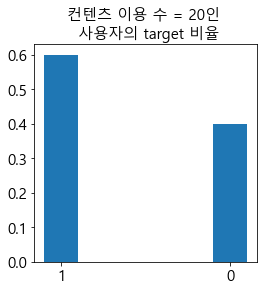

In [120]:
plt.figure(figsize=(4,4))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(f'컨텐츠 이용 수 = {len(tmp)}인 \n 사용자의 target 비율', fontdict={'fontsize':15})
plt.bar(x=['1', '0'], height=tmp.value_counts(normalize=True), data=tmp, width=0.2)

In [136]:
person_rn_set.head()

,index,person_rn
0,627445,20
1,1047079,19
2,241140,19
3,827703,19
4,1016996,18


In [224]:
basic = pd.Series([0,1], name='target')
basic = basic.astype(float)
basic

0    0.0
1    1.0
Name: target, dtype: float64

In [235]:
indx = person_rn_set.loc[3, 'index']
tmp = train[train['person_rn']==indx]['target']
tmp.value_counts(normalize=True)

1    1.0
Name: target, dtype: float64

In [236]:
rate = tmp.value_counts(normalize=True)
rate

1    1.0
Name: target, dtype: float64

In [237]:
tmp = pd.merge(rate, basic, how='outer')
tmp

,target
0,1.0
1,0.0


In [240]:
tmp2 = pd.concat([rate, basic], axis=1, ignore_index=True)
tmp2 = tmp2.fillna(0)
tmp2

,0,1
0,0.0,0.0
1,1.0,1.0


In [241]:
tmp2[0]

0    0.0
1    1.0
Name: 0, dtype: float64

## 6개씩 그래프 그리기

In [243]:
# 사용자 별 컨텐츠 이용수 
person_rn_set = train['person_rn'].value_counts().reset_index()
person_rn_set.head()

,index,person_rn
0,627445,20
1,1047079,19
2,241140,19
3,827703,19
4,1016996,18


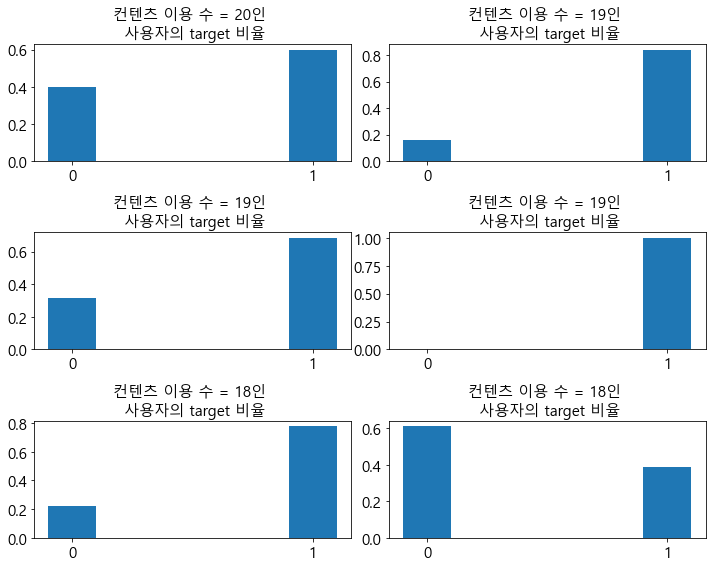

In [247]:
plt.figure(figsize=(10,8))
j = 1
for i in range(6):
    # 이용자 번호 별 타겟 비율 구하기
    indx = person_rn_set.loc[i, 'index']
    tmp = train[train['person_rn']==indx]['target']
    rate = tmp.value_counts(normalize=True)
    # 
    basic = pd.Series([0,1], name='target')
    basic = basic.astype(float)
    tmp2 = pd.concat([rate, basic], axis=1, ignore_index=True)
    tmp2 = tmp2.fillna(0)
    tmp2[0]
    
    ax = plt.subplot(3,2,j)
    plt.xticks(range(2), fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'컨텐츠 이용 수 = {len(tmp)}인 \n 사용자의 target 비율', fontdict={'fontsize':15})
    ax.bar(x=tmp2[0].index, height=tmp2[0], width=0.2)
    j += 1
plt.tight_layout()

In [244]:
for i in range(6):
    indx = person_rn_set.loc[i, 'index']
    tmp = train[train['person_rn']==indx]['target']
    print(indx)
    print(tmp.value_counts())

627445
1    12
0     8
Name: target, dtype: int64
1047079
1    16
0     3
Name: target, dtype: int64
241140
1    13
0     6
Name: target, dtype: int64
827703
1    19
Name: target, dtype: int64
1016996
1    14
0     4
Name: target, dtype: int64
53891
0    11
1     7
Name: target, dtype: int64


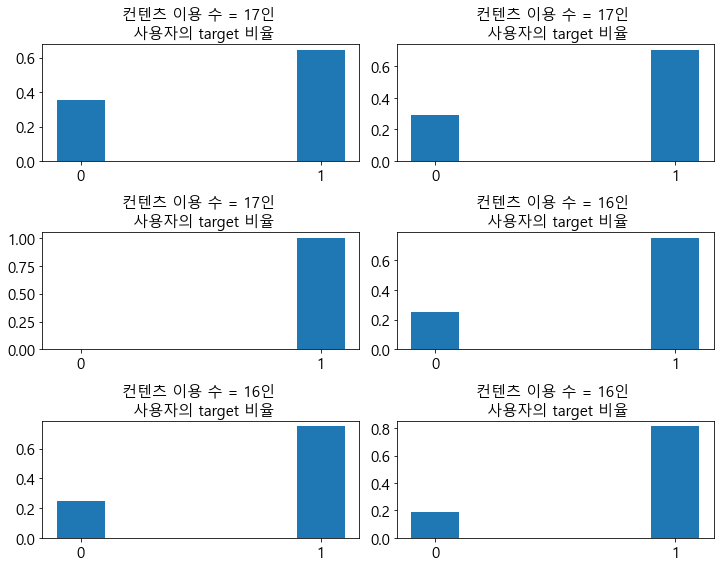

In [249]:
plt.figure(figsize=(10,8))
j = 1
for i in range(6,12):
    # 이용자 번호 별 타겟 비율 구하기
    indx = person_rn_set.loc[i, 'index']
    tmp = train[train['person_rn']==indx]['target']
    rate = tmp.value_counts(normalize=True)
    # 
    basic = pd.Series([0,1], name='target')
    basic = basic.astype(float)
    tmp2 = pd.concat([rate, basic], axis=1, ignore_index=True)
    tmp2 = tmp2.fillna(0)
    tmp2[0]
    
    ax = plt.subplot(3,2,j)
    plt.xticks(range(2), fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'컨텐츠 이용 수 = {len(tmp)}인 \n 사용자의 target 비율', fontdict={'fontsize':15})
    ax.bar(x=tmp2[0].index, height=tmp2[0], width=0.2)
    j += 1
plt.tight_layout()

In [251]:
for i in range(6,12):
    indx = person_rn_set.loc[i, 'index']
    tmp = train[train['person_rn']==indx]['target']
    print(indx)
    print(tmp.value_counts())

217730
1    11
0     6
Name: target, dtype: int64
77829
1    12
0     5
Name: target, dtype: int64
139379
1    17
Name: target, dtype: int64
358803
1    12
0     4
Name: target, dtype: int64
314186
1    12
0     4
Name: target, dtype: int64
267877
1    13
0     3
Name: target, dtype: int64


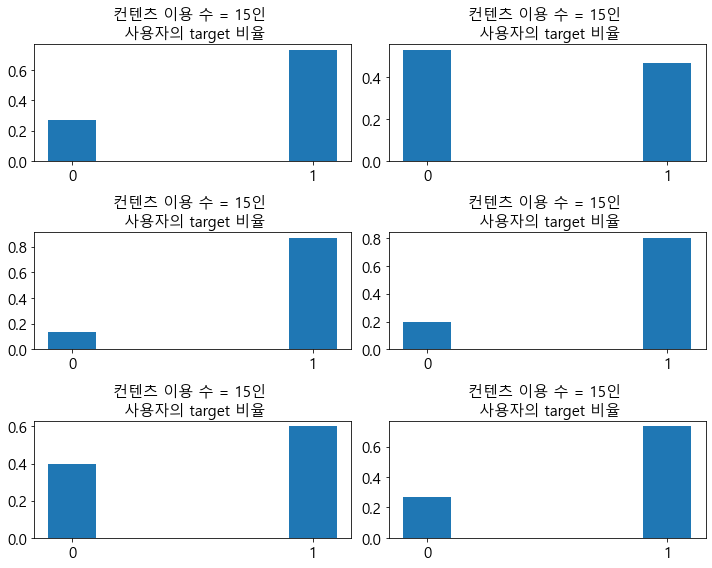

In [254]:
plt.figure(figsize=(10,8))
j = 1
for i in range(12,18):
    # 이용자 번호 별 타겟 비율 구하기
    indx = person_rn_set.loc[i, 'index']
    tmp = train[train['person_rn']==indx]['target']
    rate = tmp.value_counts(normalize=True)
    # 
    basic = pd.Series([0,1], name='target')
    basic = basic.astype(float)
    tmp2 = pd.concat([rate, basic], axis=1, ignore_index=True)
    tmp2 = tmp2.fillna(0)
    tmp2[0]
    
    ax = plt.subplot(3,2,j)
    plt.xticks(range(2), fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'컨텐츠 이용 수 = {len(tmp)}인 \n 사용자의 target 비율', fontdict={'fontsize':15})
    ax.bar(x=tmp2[0].index, height=tmp2[0], width=0.2)
    j += 1
plt.tight_layout()

In [255]:
for i in range(12,18):
    indx = person_rn_set.loc[i, 'index']
    tmp = train[train['person_rn']==indx]['target']
    print(indx)
    print(tmp.value_counts())

658174
1    11
0     4
Name: target, dtype: int64
490691
0    8
1    7
Name: target, dtype: int64
134513
1    13
0     2
Name: target, dtype: int64
255445
1    12
0     3
Name: target, dtype: int64
476761
1    9
0    6
Name: target, dtype: int64
177296
1    11
0     4
Name: target, dtype: int64
